Part 1: Load, process, and organize the data set.

In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

DATA_DIRECTORY = '/Users/andreaspiteri/uni/year-3/ai/data-sets/cats-and-dogs/PetImages'
CATEGORIES = ['Dog', 'Cat']
IMG_SIZE = 50

In [57]:
def create_training_dataset(img_size: int = 100) -> list[list[np.ndarray, int]]:
    """
    :param IMG_SIZE:
    :return:

    Loops over the 'Dog' and 'Cat' folders in the data set and returns them as a list with their labels.
    """
    data = []

    for category in CATEGORIES:
        path_to_image = os.path.join(DATA_DIRECTORY, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path_to_image):
            try:
                img_array: np.ndarray = cv2.imread(os.path.join(path_to_image, img), cv2.IMREAD_GRAYSCALE)
                resized_img: np.ndarray = cv2.resize(img_array, (img_size, img_size))

                # Image array, and it's label.
                data.append([resized_img, class_num])

            except Exception as err:  # Some images caused issues, we are just ignoring these.
                pass

    return data

In [58]:
training_data: list[list[np.ndarray, int]] = create_training_dataset(IMG_SIZE)

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


In [59]:
# Check if training_date is populated.
print(len(training_data))

24946


In [60]:
import random

random.shuffle(training_data)

In [61]:
# Uppercase 'X' typically are the features and lower case 'y' are the labels.

X: list[np.ndarray] = []
y: list[int] = []

In [62]:
for feature, label in training_data:
    X.append(feature)
    y.append(label)

X = np.array(X).reshape((-1, IMG_SIZE, IMG_SIZE, 1))
y = np.array(y)

In [63]:
# Use pickle to store processed and organized dataset.

import pickle

with open('./X.pickle', 'wb') as file:
    pickle.dump(X, file)

with open('./y.pickle', 'wb') as file:
    pickle.dump(y, file)

Part 2: Build and train the model.

In [64]:
# Use pickle to load the saved data.

with open('X.pickle', 'rb') as file:
    X: np.ndarray = pickle.load(file)

with open('y.pickle', 'rb') as file:
    y: list = pickle.load(file)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.utils as utils

# Normalize the data.
X: np.ndarray = X / 255.0

In [66]:
# Define model architecture.
model = Sequential([
    Conv2D(64, (3, 3), input_shape=X.shape[1:], activation=relu),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation=relu),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation=relu),
    Dense(1, activation=sigmoid),
])

model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

In [71]:
# Train model.
history = model.fit(
    X,
    y,
    batch_size=32,
    validation_split=0.1,
    epochs=20
)

Epoch 1/20
702/702 [==============================] - 60s 85ms/step - loss: 0.3460 - accuracy: 0.8464 - val_loss: 0.4713 - val_accuracy: 0.7956
Epoch 2/20
702/702 [==============================] - 59s 84ms/step - loss: 0.3344 - accuracy: 0.8519 - val_loss: 0.4826 - val_accuracy: 0.7940
Epoch 3/20
702/702 [==============================] - 58s 83ms/step - loss: 0.3253 - accuracy: 0.8568 - val_loss: 0.4763 - val_accuracy: 0.7928
Epoch 4/20
702/702 [==============================] - 52s 74ms/step - loss: 0.3131 - accuracy: 0.8638 - val_loss: 0.5415 - val_accuracy: 0.7747
Epoch 5/20
702/702 [==============================] - 51s 73ms/step - loss: 0.3033 - accuracy: 0.8681 - val_loss: 0.4760 - val_accuracy: 0.7980
Epoch 6/20
702/702 [==============================] - 50s 71ms/step - loss: 0.2970 - accuracy: 0.8694 - val_loss: 0.5576 - val_accuracy: 0.7675
Epoch 7/20
702/702 [==============================] - 54s 77ms/step - loss: 0.2853 - accuracy: 0.8780 - val_loss: 0.5011 - val_accuracy:

In [72]:
history_dict = history.history

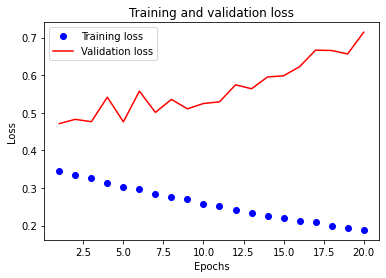

In [73]:
loss: list = history_dict['loss']
val_loss: list = history_dict['val_loss']
epochs= range(1, len(loss) + 1)

blue_dots = 'bo'
solid_red_line = 'r'

plt.plot(epochs, loss, blue_dots, label = 'Training loss')
plt.plot(epochs, val_loss, solid_red_line, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

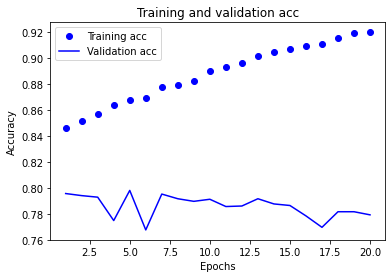

In [74]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'

plt.plot(epochs, acc, blue_dots, label = 'Training acc')
plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()